# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
cities


['dunedin',
 'pacific grove',
 'limon',
 'benghazi',
 'avarua',
 'new norfolk',
 'mataura',
 'adre',
 'ushuaia',
 'puerto ayora',
 'port alfred',
 'rikitea',
 'bluff',
 'hamilton',
 'jamestown',
 'san patricio',
 'longyearbyen',
 'saint anthony',
 'visimo-utkinsk',
 'beni',
 'jiddah',
 'saskylakh',
 'taolanaro',
 'dwarka',
 'tiznit',
 'hobart',
 'amderma',
 'itarema',
 'saint george',
 'metro',
 'karabulak',
 'barentsburg',
 'atuona',
 'punta arenas',
 'vaini',
 'thinadhoo',
 'leavenworth',
 'hedaru',
 'thompson',
 'tuktoyaktuk',
 'codrington',
 'upernavik',
 'cape town',
 'hermanus',
 'salalah',
 'caucaia',
 'illoqqortoormiut',
 'bend',
 'arman',
 'port augusta',
 'hirara',
 'thunder bay',
 'fortuna',
 'busselton',
 'east london',
 'sabang',
 'doha',
 'kenai',
 'xingyi',
 'kruisfontein',
 'grand gaube',
 'buraydah',
 'torbay',
 'vicuna',
 'albany',
 'nizhneyansk',
 'birjand',
 'kapaa',
 'dikson',
 'cordoba',
 'nikolskoye',
 'victoria',
 'souillac',
 'margate',
 'arraial do cabo',
 'po

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
city_id =[]
lat=[]
long=[]
temp=[]
clouds=[]
humidity=[]
wind_speed=[]


for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ 'imperial'
    weather_response1 = requests.get(query_url)
    weather1_json = weather_response1.json()
    try:
        city_name.append(weather1_json['name'])
        city_id.append(weather1_json['id'])
        temp.append(weather1_json['main']['temp'])
        lat.append(weather1_json['coord']['lat'])
        long.append(weather1_json['coord']['lon'])
        clouds.append(weather1_json['clouds']['all'])
        humidity.append(weather1_json['main']['humidity'])
        wind_speed.append(weather1_json['wind']['speed'])
        print(f"{city}: {weather1_json['id']}")
    except KeyError:
        print(f"{city} is not available")
        

dunedin: 2191562
pacific grove: 5380437
limon: 3622247
benghazi: 88319
avarua: 4035715
new norfolk: 2155415
mataura: 6201424
adre: 245669
ushuaia: 3833367
puerto ayora: 3652764
port alfred: 964432
rikitea: 4030556
bluff: 2206939
hamilton: 4513583
jamestown: 5122534
san patricio: 4726521
longyearbyen: 2729907
saint anthony: 5044290
visimo-utkinsk is not available
beni: 219057
jiddah is not available
saskylakh: 2017155
taolanaro is not available
dwarka: 1272140
tiznit: 2527087
hobart: 2163355
amderma is not available
itarema: 3393692
saint george: 5546220
metro: 1635283
karabulak: 552951
barentsburg is not available
atuona: 4020109
punta arenas: 3874787
vaini: 4032243
thinadhoo: 1337610
leavenworth: 4274307
hedaru: 159647
thompson: 6165406
tuktoyaktuk: 6170031
codrington: 2171099
upernavik: 3418910
cape town: 3369157
hermanus: 3366880
salalah: 286621
caucaia: 3402429
illoqqortoormiut is not available
bend: 5713587
arman: 2127060
port augusta: 2063056
hirara: 1862505
thunder bay: 6166142


nabire: 1634614
lasa: 3175096
westport: 4845585
lisakovsk: 1521315
camocim: 3403687
do gonbadan: 136014
saint-joseph: 6690296
panama city: 3703443
neyshabur: 122285
anchovy: 3491570
pochutla: 3517970
jumla: 1283285
andrews: 5516288
port hardy: 6111862
natal: 3394023
hobyo: 57000
ankang: 1789065
chara: 2025630
toucheng: 1674199
brae: 2654970
chiman: 1179790
general nakar: 1713024
kununurra: 2068110
pirot: 787050
storslett: 777381
kuusamo: 649924
mendahara is not available
marabba: 370510
arkhangelos is not available
watsa: 204283
pimentel: 3693584
oistins: 3373652
havre-saint-pierre: 5972291
santa rosa: 1687894
honningsvag: 779554
ulcinj: 3188516
lahaina: 5849996
oktyabrskiy: 515879
acarau: 3408368
teya: 1489656
babanusah is not available
gangotri is not available
big spring: 5517061
caramay: 1718517
khani: 610864
bilma: 2446796
alta: 847633
umm lajj: 100926
nago: 1856068
marsani: 673090
teguldet: 1489822
capoterra: 6537892
manthani: 1263610
yakeshi: 2033536
road town: 3577430
casma: 38

In [5]:
len(lat)

563

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_dict={'city': city_name,
           'city_id':city_id,
           'latitude': lat,
           'longitude': long,
           'temperature': temp,
           'cloudiness': clouds,
           'humidity':humidity,
           'wind_speed':wind_speed}
weather_dict
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(r'weather_search.csv',index=False)
weather_df

,city,city_id,latitude,longitude,temperature,cloudiness,humidity,wind_speed
0,Dunedin,2191562,-45.8742,170.5036,55.99,66,85,3.58
1,Pacific Grove,5380437,36.6177,-121.9166,57.25,75,59,13.80
2,Puerto Limón,3622247,10.0000,-83.0333,80.60,0,78,4.61
3,Benghazi,88319,32.1167,20.0667,74.25,88,37,9.55
4,Avarua,4035715,-21.2078,-159.7750,82.40,40,74,18.41
...,...,...,...,...,...,...,...,...
558,Pestovo,510364,58.5938,35.8024,36.34,100,95,3.62
559,Roald,3141667,62.5833,6.1333,31.71,93,93,10.92
560,Ulaangom,1515029,49.9811,92.0667,31.84,86,66,3.29
561,Portland,5746545,45.5234,-122.6762,60.58,90,47,6.91


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
len(weather_df.loc[weather_df['humidity']>100])

0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

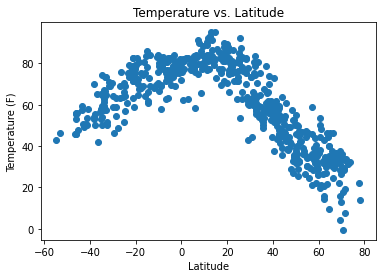

In [8]:
x=weather_df['latitude']
y=weather_df['temperature']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude")
plt.savefig('Temp_vs_Lat')
plt.show()

- As expected, tempertures rise the as you get closer to the equator.  The northern hemispere is still in early sprig and therefore has lower temperatures.  (Analysis 4/22)

## Latitude vs. Humidity Plot

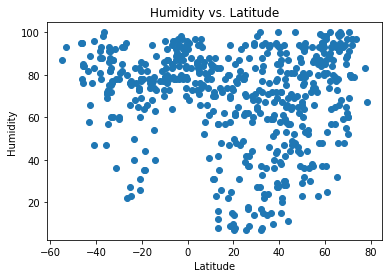

In [9]:
x=weather_df['latitude']
y=weather_df['humidity']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.savefig('Humidity_vs_Lat')
plt.show()

 - Latitude doesn't appear to have an effect on high levels of humidity.  Although lower humidity levels are more prominent in the northern hemisphere, which could be a seasonal effect. (Analysis 4/22)

## Latitude vs. Cloudiness Plot

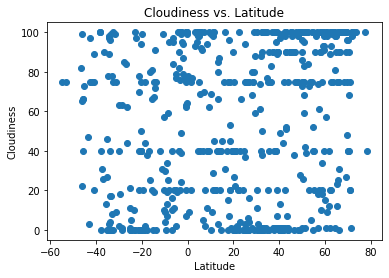

In [10]:
x=weather_df['latitude']
y=weather_df['cloudiness']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude")
plt.savefig('Cloudiness_vs_Lat')
plt.show()

- Latitude doesn't have any affect on cloudiness.  (Analysis 4/22)

## Latitude vs. Wind Speed Plot

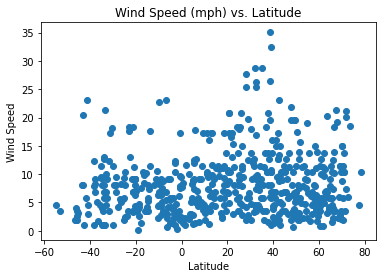

In [11]:
x=weather_df['latitude']
y=weather_df['wind_speed']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.savefig('WindSpeed_vs_Lat')
plt.show()

- There doesn't appear to be any relationship between wind speed and latitude. (Analysis 4/22)

## Linear Regression

In [12]:
northern_hem_df = weather_df.loc[weather_df['latitude']>=0]
#northern_hem_df

southern_hem_df = weather_df.loc[weather_df['latitude']<=0]
southern_hem_df

,city,city_id,latitude,longitude,temperature,cloudiness,humidity,wind_speed
0,Dunedin,2191562,-45.8742,170.5036,55.99,66,85,3.58
4,Avarua,4035715,-21.2078,-159.7750,82.40,40,74,18.41
5,New Norfolk,2155415,-42.7826,147.0587,48.97,97,89,1.01
6,Mataura,6201424,-46.1927,168.8643,46.00,65,95,1.99
8,Ushuaia,3833367,-54.8000,-68.3000,42.80,75,87,4.61
...,...,...,...,...,...,...,...,...
541,Poum,2138555,-20.2333,164.0167,79.02,94,77,7.07
547,Samarai,2132606,-10.6167,150.6667,83.21,99,77,10.63
552,Binga,895057,-17.6203,27.3414,68.18,0,66,1.30
554,Coxim,3465228,-18.5067,-54.7600,80.71,2,35,4.27


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

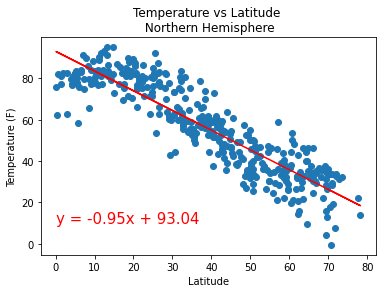

In [13]:
x=northern_hem_df['latitude']
y=northern_hem_df['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Temperature vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
plt.savefig('Temp_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

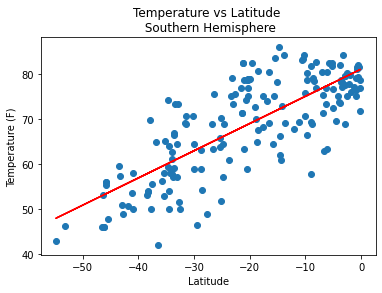

In [14]:
x=southern_hem_df['latitude']
y=southern_hem_df['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Temperature vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.savefig('Temp_vs_Lat_SouthernHem')
plt.show()

- As stated above, latitude has a directly correlated to temperatures.  The closer you are to the equator, the higher the temperatures.  This is evidenced with the regression line for both the northern and southern hemispheres graphs. (Analysis 4/22)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

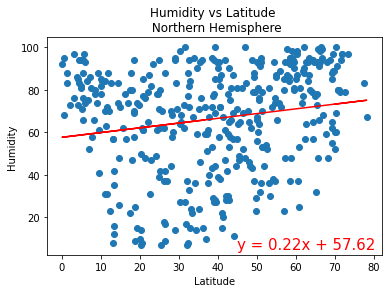

In [15]:
x=northern_hem_df['latitude']
y=northern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(45,5),fontsize=15,color='red')
plt.savefig('Humidity_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

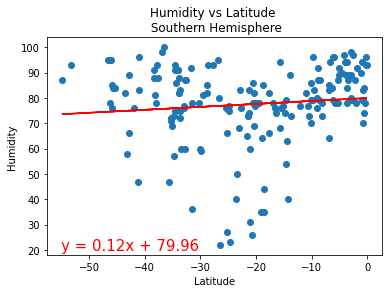

In [16]:
x=southern_hem_df['latitude']
y=southern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.savefig('Humidity_vs_Lat_SouthernHem')
plt.show()

- Latitude no affect on humidity for either the northern or southern hemisphere.  This is confirmed with the respective low r-values, northern (0.24) and southern (0.04).  (Analysis 4/23)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

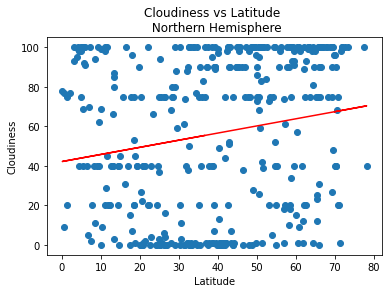

Linear regression: y = 0.36x + 42.16


In [17]:
x=northern_hem_df['latitude']
y=northern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Northern Hemisphere")
plt.savefig('Cloudiness_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

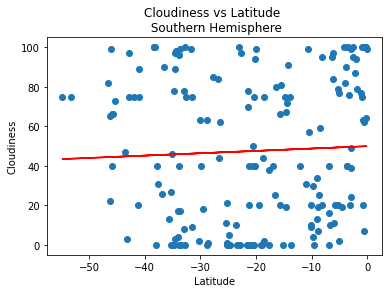

Linear regression: y = 0.12x + 49.95


In [18]:
x=southern_hem_df['latitude']
y=southern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Southern Hemisphere")
plt.savefig('Cloudiness_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

Latitude no affect on cloudiness for either the northern or southern hemisphere. This is confirmed with the respective low r-values, northern (0.34) and southern (0.3).  The northern hemisphere's higher r-value may be due to seasonality as it is early spring.  (Analysis 4/23)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

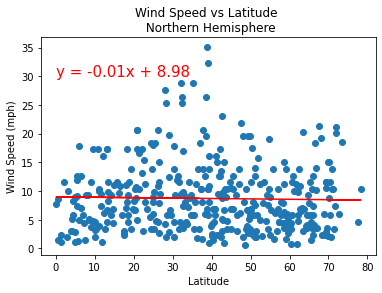

Linear regression: y = -0.01x + 8.98


In [19]:
x=northern_hem_df['latitude']
y=northern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,30),fontsize=15,color='red')
plt.savefig('WindSpeed_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

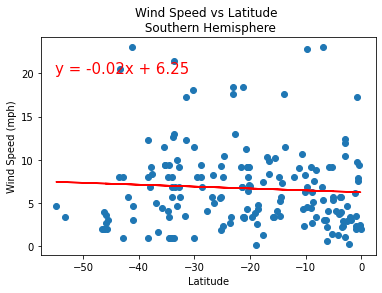

Linear regression: y = -0.02x + 6.25


In [20]:
x=southern_hem_df['latitude']
y=southern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.savefig('WindSpeed_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

Wind speed is not related to latitude.   This is confirmed with the respective low r-values, northern (0.0) and southern (0.03). (Analysis 4/23)